# Housing Prices in King County, WA: K Nearest Neighbors Analysis
Goal
- Analyze K Nearest Neighbors predictors in relation to predictor and response variables

## Obtain Data

In [1]:
# global imports

# matplotlib features
import matplotlib.pyplot as plt

# numpy features
import numpy as np

# scipy features
from scipy.stats import gaussian_kde

In [2]:
# import stored values 
%store -r knn_test_data

## Visualizations of Response and Prediction
### Scatterplot of 'predictions' vs 'price'
- The scatterplot shows a fairly linear relationship between 'price' and 'predictions'
    - When the actual sale price increases, the predicted sale price increases
    - The slope of the regression line is fairly close to 1
- The scatterplot for prices less than $2000000 shows values are centered around the line y=x
    - The line y=x means prediction equals price

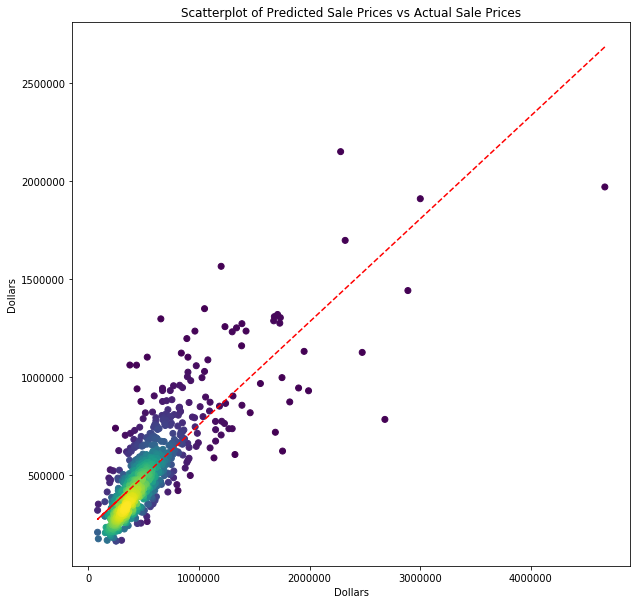

slope: 0.525236874477182
y intercept: 230670.4515346941


In [3]:
# entire scatterplot
# color by density
x = knn_test_data['price']
y = knn_test_data['predictions']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# scatterplot for price vs lot square footage
plt.figure(figsize = [10,10])
plt.scatter(x, y, c=z)
plt.xlabel('Dollars')
plt.ylabel('Dollars')
plt.title('Scatterplot of Predicted Sale Prices vs Actual Sale Prices')
# add trendline
w = np.polyfit(x, y, 1)
p = np.poly1d(w)
plt.plot(x, p(x), 'r--')
plt.show()
# output equation of the line
print("slope: %s" %w[0])
print("y intercept: %s" %w[1])

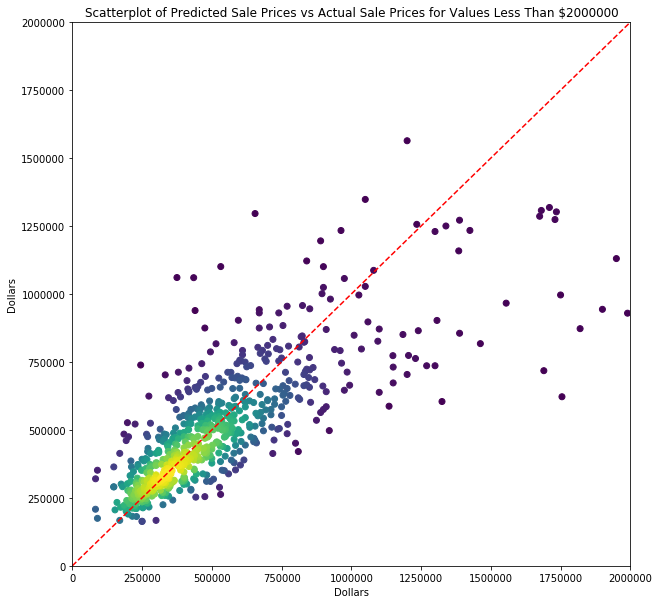

In [4]:
# scatterplot without large values
# color by density
x = knn_test_data['price']
y = knn_test_data['predictions']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# scatterplot for price vs lot square footage
plt.figure(figsize = [10,10])
plt.scatter(x, y, c=z)
plt.xlabel('Dollars')
plt.ylabel('Dollars')
plt.title('Scatterplot of Predicted Sale Prices vs Actual Sale Prices for Values Less Than $2000000')
plt.xlim(0, 2000000)
plt.ylim(0,2000000)
# add line with slope of 1
w = np.linspace(0, 2000000, 5)
plt.plot(w, w, 'r--')
plt.show()

### Scatterplot of 'abs_difference' vs 'price'
- As price increases, the absolute prediction difference increases
    - In general, predictions are less accurate for larger sale prices
        - Large sale prices are outliers
        - Therefore, the model is not well trained for predicting large sale prices

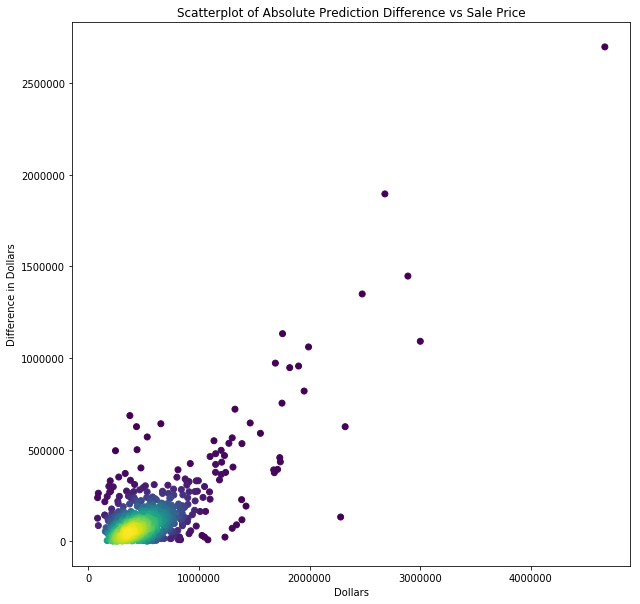

In [5]:
# color by density
x = knn_test_data['price']
y = knn_test_data['abs_difference']
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# scatterplot for price vs lot square footage
plt.figure(figsize = [10,10])
plt.scatter(x, y, c=z)
plt.xlabel('Dollars')
plt.ylabel('Difference in Dollars')
plt.title('Scatterplot of Absolute Prediction Difference vs Sale Price')
plt.show()

## Visualizations of Predictor and Predictions
### 'abs_difference' Grouped by 'location'
- Homes sold in East Urban and Seattle have the largest absolute prediction differences
    - *WashingtonHouseSales-DataVisualization* shows that these locations also have the most outliers for price
        - The model is not well trained for predicting outlier values
- Homes sold in North and South Rural have the smallest absolute prediction differences
    - *WashingtonHouseSales-DataVisualization* shows South Rural has very few outliers for price

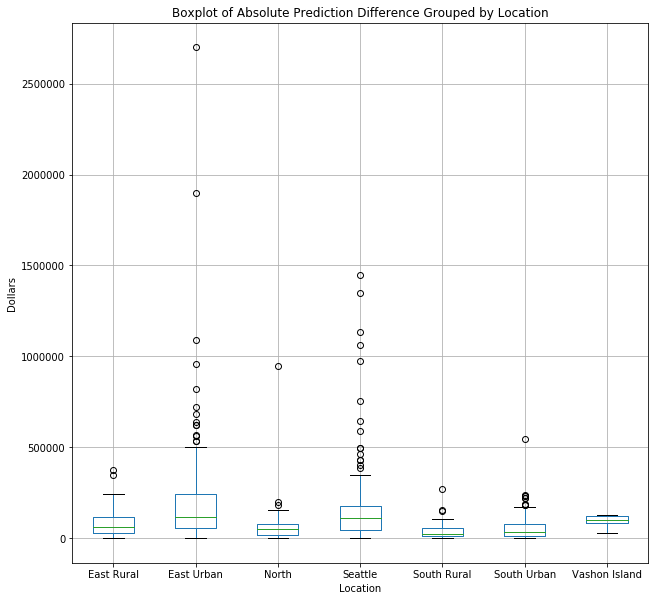

In [6]:
# boxplot for abs_difference vs location
ax = knn_test_data.boxplot(column='abs_difference', by='location', figsize = [10,10])
ax.set_xlabel('Location')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Absolute Prediction Difference Grouped by Location')
plt.suptitle('')
plt.show()

### 'abs_difference' Grouped by 'waterfront'
- Homes with a waterfront typically have a larger absolute prediction difference
    - This indicates the model has not learned the effect waterfronts have on the sale price of homes

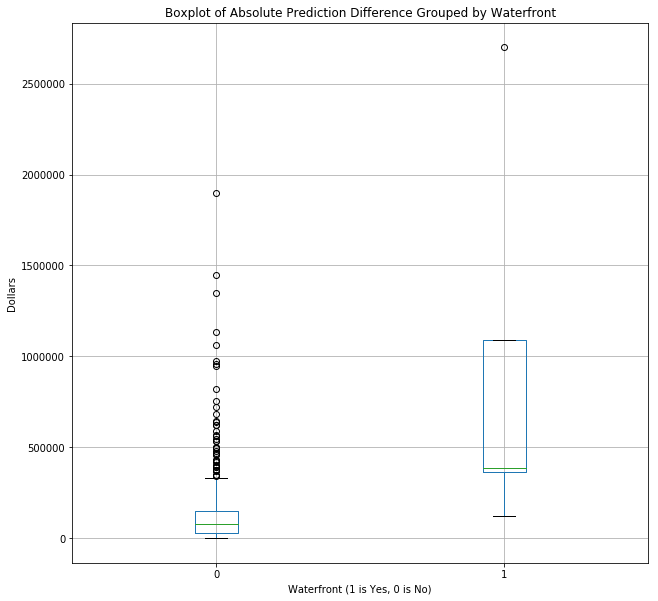

In [7]:
# boxplot for abs_difference vs waterfront
ax = knn_test_data.boxplot(column='abs_difference', by='waterfront', figsize = [10,10])
ax.set_xlabel('Waterfront (1 is Yes, 0 is No)')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Absolute Prediction Difference Grouped by Waterfront')
plt.suptitle('')
plt.show()

### 'abs_difference' Grouped by 'view'
- View ratings less than 3 have smaller absolute prediction differences than view ratings of 3 or greater

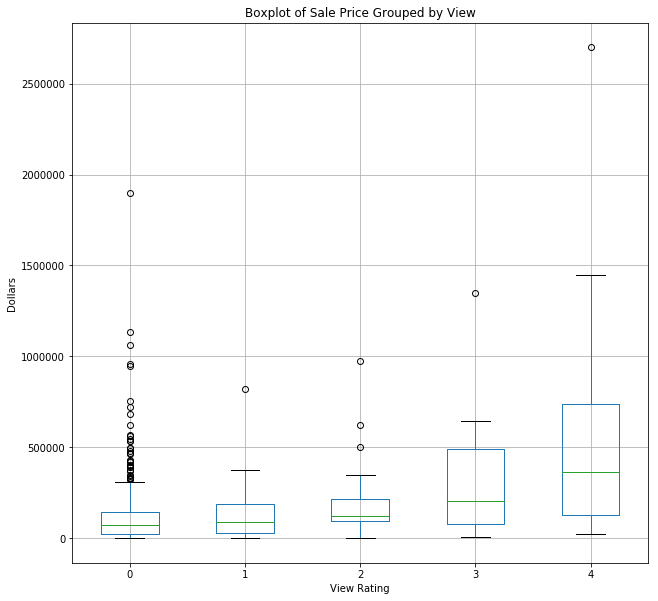

In [8]:
# boxplot for abs_difference vs waterfront
ax = knn_test_data.boxplot(column='abs_difference', by='view', figsize = [10,10])
ax.set_xlabel('View Rating')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Sale Price Grouped by View')
plt.suptitle('')
plt.show()

### 'abs_difference' Grouped by 'condition'
- Condition rating of 2 has the lowest absolute predictor differences
- Condition rating of 5 has the greatest absolute predictor differences

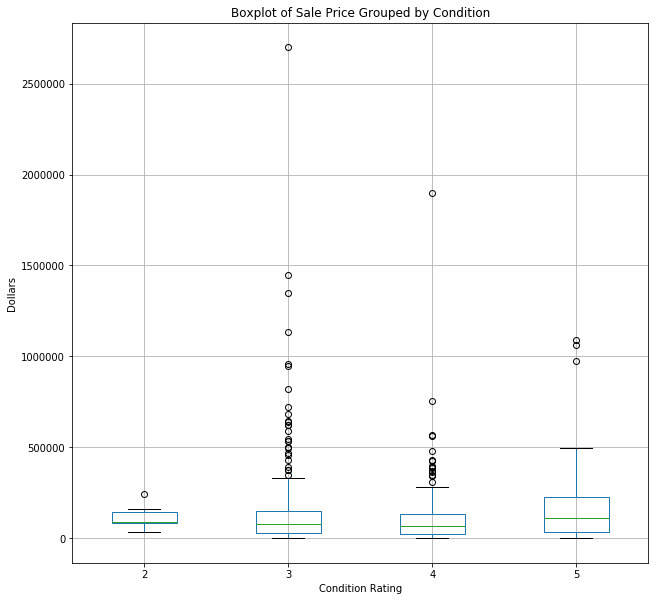

In [9]:
# boxplot for abs_difference vs condition
ax = knn_test_data.boxplot(column='abs_difference', by='condition', figsize = [10,10])
ax.set_xlabel('Condition Rating')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Sale Price Grouped by Condition')
plt.suptitle('')
plt.show()

### 'abs_difference' Grouped by 'bedroom'
- Homes with less than 4 bedrooms have smaller absolute prediction differences than homes with 4 or more bedrooms
    - *WashingtonHouseSales-DataVisualization* shows there are wider ranges for prices for homes with 4 or more bedrooms
    - This means the model has a harder time determining sale price when a home has 4 or more bedrooms

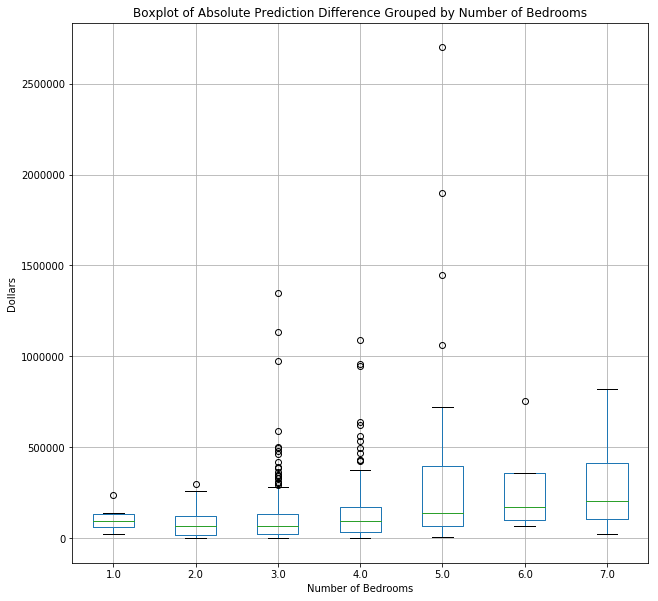

In [10]:
# boxplot for abs_difference vs bedroom
ax = knn_test_data.boxplot(column='abs_difference', by='bedroom', figsize = [10,10])
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Dollars')
plt.title('Boxplot of Absolute Prediction Difference Grouped by Number of Bedrooms')
plt.suptitle('')
plt.show()